## About

It's just and extenstion of another Jupyter Notebook, which means detail about data can be found here [nrel-oahu-solar-start.ipynb](nrel-oahu-solar-start.ipynb).


### Configurations

Importing requred packages. Setting first configuration settings.

In [1]:
# global constants

DATA_FOLDER = 'data'

In [2]:
%matplotlib inline

import os
import glob
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [3]:
# global IPython settings

#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')
#np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [4]:
# column names

columns = ['Seconds',
            'Year',
            'DOY',
            'HST',
            'GlobHoriz DH3 (201)',
            'GlobHoriz DH4 (202)',
            'GlobHoriz DH5 (203)',
            'GlobHoriz DH10 (204)',
            'GlobHoriz DH11 (205)',
            'GlobHoriz DH9 (206)',
            'GlobHoriz DH2 (207)',
            'GlobHoriz DH1 (208)',
            'GlobTilt DH1 (208)',
            'GlobHoriz AP6 (209)',
            'GlobTilt AP6 (209)',
            'GlobHoriz AP1 (210)',
            'GlobHoriz AP3 (211)',
            'GlobHoriz AP5 (212)',
            'GlobHoriz AP4 (213)',
            'GlobHoriz AP7 (214)',
            'GlobHoriz DH6 (215)',
            'GlobHoriz DH7 (216)',
            'GlobHoriz DH8 (217)']

target_cols = columns[4:]
single_pv = 'GlobHoriz DH3 (201)'

print ('SOLAR PANELS:\n{0}\n'.format('\n'.join(target_cols)))
print ("TOTAL SOLAR PANELS:\n{0}\n".format(len(target_cols)))
print ("SELECTED SINGLE PANEL:\n{0}\n".format(single_pv))

SOLAR PANELS:
GlobHoriz DH3 (201)
GlobHoriz DH4 (202)
GlobHoriz DH5 (203)
GlobHoriz DH10 (204)
GlobHoriz DH11 (205)
GlobHoriz DH9 (206)
GlobHoriz DH2 (207)
GlobHoriz DH1 (208)
GlobTilt DH1 (208)
GlobHoriz AP6 (209)
GlobTilt AP6 (209)
GlobHoriz AP1 (210)
GlobHoriz AP3 (211)
GlobHoriz AP5 (212)
GlobHoriz AP4 (213)
GlobHoriz AP7 (214)
GlobHoriz DH6 (215)
GlobHoriz DH7 (216)
GlobHoriz DH8 (217)

TOTAL SOLAR PANELS:
19

SELECTED SINGLE PANEL:
GlobHoriz DH3 (201)



## Load and View All Data

In [5]:
# taking only one year - (2010, 2011)
#selected_year = '2010'
selected_year = '2011'

# reading data from multiple txt files
folders = [x[0] for x in os.walk(DATA_FOLDER)]
csv_files = []
for folder in folders:
    #if selected_year in folder:
    csv_files = csv_files + glob.glob(os.path.join(folder, "*.txt"))

#print("Files to be imported: {0}".format('\n'.join(csv_files)))
print("Total files to be imported: {0}".format(len(csv_files)))

df_from_all_files = (pd.read_csv(f, header=None, sep=',') for f in csv_files)
concatenated_df   = pd.concat(df_from_all_files, ignore_index=False)
dataset_all = concatenated_df

# set column names from settings
dataset_all.columns = columns

dataset_all.head(5)

Total files to be imported: 593


Seconds  Year  DOY  HST  GlobHoriz DH3 (201)  GlobHoriz DH4 (202)  \
0        0  2010   77  500             -99999.0             -99999.0   
1        1  2010   77  500             -99999.0             -99999.0   
2        2  2010   77  500             -99999.0             -99999.0   
3        3  2010   77  500             -99999.0             -99999.0   
4        4  2010   77  500             -99999.0             -99999.0   

   GlobHoriz DH5 (203)  GlobHoriz DH10 (204)  GlobHoriz DH11 (205)  \
0             -99999.0              -99999.0              -99999.0   
1             -99999.0              -99999.0              -99999.0   
2             -99999.0              -99999.0              -99999.0   
3             -99999.0              -99999.0              -99999.0   
4             -99999.0              -99999.0              -99999.0   

   GlobHoriz DH9 (206)         ...           GlobHoriz AP6 (209)  \
0             -99999.0         ...                           0.0   
1             -99999.0         ...                           0.0   
2             -99999.0         ...                           0.0   
3             -99999.0         ...                           0.0   
4             -99999.0         ...                           0.0   

   GlobTilt AP6 (209)  GlobHoriz AP1 (210)  GlobHoriz AP3 (211)  \
0                 0.0                  0.0                  0.0   
1                 0.0                  0.0                  0.0   
2                 0.0                  0.0                  0.0   
3                 0.0                  0.0                  0.0   
4                 0.0                  0.0                  0.0   

   GlobHoriz AP5 (212)  GlobHoriz AP4 (213)  GlobHoriz AP7 (214)  \
0                  0.0            -0.358605                  0.0   
1                  0.0            -0.358605                  0.0   
2                  0.0             0.000000                  0.0   
3                  0.0            -0.358605                  0.0   
4                  0.0             0.000000                  0.0   

   GlobHoriz DH6 (215)  GlobHoriz DH7 (216)  GlobHoriz DH8 (217)  
0             -99999.0             -99999.0             -99999.0  
1             -99999.0             -99999.0             -99999.0  
2             -99999.0             -99999.0             -99999.0  
3             -99999.0             -99999.0             -99999.0  
4             -99999.0             -99999.0             -99999.0  

[5 rows x 23 columns]

In [7]:
dataset_all.tail(5)

Seconds  Year  DOY   HST  GlobHoriz DH3 (201)  GlobHoriz DH4 (202)  \
53996       56  2011  304  1959                  0.0                  0.0   
53997       57  2011  304  1959                  0.0                  0.0   
53998       58  2011  304  1959                  0.0                  0.0   
53999       59  2011  304  1959                  0.0                  0.0   
54000        0  2011  304  2000                  0.0                  0.0   

       GlobHoriz DH5 (203)  GlobHoriz DH10 (204)  GlobHoriz DH11 (205)  \
53996                  0.0                   0.0              0.000000   
53997                  0.0                   0.0             -0.385969   
53998                  0.0                   0.0              0.000000   
53999                  0.0                   0.0              0.000000   
54000                  0.0                   0.0              0.000000   

       GlobHoriz DH9 (206)         ...           GlobHoriz AP6 (209)  \
53996             0.000000         ...                           0.0   
53997            -0.472147         ...                           0.0   
53998            -0.472147         ...                           0.0   
53999            -0.472147         ...                           0.0   
54000            -0.472147         ...                           0.0   

       GlobTilt AP6 (209)  GlobHoriz AP1 (210)  GlobHoriz AP3 (211)  \
53996                 0.0             -99999.0             -99999.0   
53997                 0.0             -99999.0             -99999.0   
53998                 0.0             -99999.0             -99999.0   
53999                 0.0             -99999.0             -99999.0   
54000                 0.0             -99999.0             -99999.0   

       GlobHoriz AP5 (212)  GlobHoriz AP4 (213)  GlobHoriz AP7 (214)  \
53996                  0.0             -0.35854             -99999.0   
53997                  0.0              0.00000             -99999.0   
53998                  0.0              0.00000             -99999.0   
53999                  0.0             -0.35854             -99999.0   
54000                  0.0             -0.35854             -99999.0   

       GlobHoriz DH6 (215)  GlobHoriz DH7 (216)  GlobHoriz DH8 (217)  
53996                  0.0                  0.0                  0.0  
53997                  0.0                  0.0                  0.0  
53998                  0.0                  0.0                  0.0  
53999                  0.0                  0.0                  0.0  
54000                  0.0                  0.0                  0.0  

[5 rows x 23 columns]

#### Grouping Data By Day and Summing All Values

In [6]:
# first grouping by day and time

aggr_hst_doy_df_all = dataset_all.groupby(['Year', 'DOY', 'HST']).aggregate(np.mean)
aggr_hst_doy_df_all = aggr_hst_doy_df_all.reset_index()
aggr_hst_doy_df_all[target_cols].describe()

GlobHoriz DH3 (201)  GlobHoriz DH4 (202)  GlobHoriz DH5 (203)  \
count        534293.000000        534293.000000        534293.000000   
mean            207.447987           200.833799           204.762525   
std            4133.658929          4132.376408          4132.893634   
min          -99999.000000        -99999.000000        -99999.000000   
25%              34.997032            38.710350            38.721333   
50%             284.846133           286.456467           288.547433   
75%             640.924033           628.918700           636.306267   
max            1617.276783          1489.372833          1532.512833   

       GlobHoriz DH10 (204)  GlobHoriz DH11 (205)  GlobHoriz DH9 (206)  \
count         534293.000000         534293.000000        534293.000000   
mean             205.140052            201.853740           205.581981   
std             4132.769042           4132.467918          4133.579372   
min           -99999.000000         -99999.000000        -99999.000000   
25%               39.741132             37.375030            34.567848   
50%              291.716950            288.385883           281.160583   
75%              636.119350            630.134367           638.699033   
max             1521.638667           1538.720500          1589.570167   

       GlobHoriz DH2 (207)  GlobHoriz DH1 (208)  GlobTilt DH1 (208)  \
count        534293.000000        534293.000000       534293.000000   
mean            201.611538            96.140002           42.013741   
std            4132.519657          5243.462084         5240.972304   
min          -99999.000000        -99999.000000       -99999.000000   
25%              35.949837            35.017710           28.658200   
50%             286.560200           286.392467          167.822417   
75%             631.722250           629.181017          541.323067   
max            1535.787333          1508.490833         1440.485833   

       GlobHoriz AP6 (209)  GlobTilt AP6 (209)  GlobHoriz AP1 (210)  \
count        534293.000000       534293.000000        534293.000000   
mean            375.917712          308.761904           313.219147   
std             347.559952          330.654677          2396.573856   
min              -0.390298           -0.364069        -99999.000000   
25%              40.147007           34.081645            40.117020   
50%             292.812000          177.979517           289.074067   
75%             639.219467          524.310350           627.992050   
max            1558.039667         1383.416167          1514.895500   

       GlobHoriz AP3 (211)  GlobHoriz AP5 (212)  GlobHoriz AP4 (213)  \
count        534293.000000        534293.000000        534293.000000   
mean         -31276.057739           374.021219           370.361931   
std           46630.713730           346.796743           340.753434   
min          -99999.000000             0.000000            -0.358600   
25%          -99999.000000            40.108452            40.450120   
50%              47.083492           290.232350           290.241867   
75%             442.087667           635.213833           629.864217   
max            1577.671167          1624.986667          1553.999000   

       GlobHoriz AP7 (214)  GlobHoriz DH6 (215)  GlobHoriz DH7 (216)  \
count        534293.000000        534293.000000        534293.000000   
mean            268.846010           205.410717           206.813898   
std            3286.846513          4132.913973          4133.103672   
min          -99999.000000        -99999.000000        -99999.000000   
25%              36.958715            38.069817            39.215365   
50%             289.408850           290.513500           290.650517   
75%             639.198067           637.210000           639.563667   
max            1548.230167          1513.279833          1538.190500   

       GlobHoriz DH8 (217)  
count        534293.000000  
mean            201.629454  
std            4132.487887

In [8]:
# second grouping of already grouped data only by day

aggr_doy2_df_all = aggr_hst_doy_df_all.groupby(['Year', 'DOY']).aggregate(np.mean)
aggr_doy2_df_all = aggr_doy2_df_all.reset_index()
aggr_doy2_df_all[target_cols].describe()

GlobHoriz DH3 (201)  GlobHoriz DH4 (202)  GlobHoriz DH5 (203)  \
count           593.000000           593.000000           593.000000   
mean            207.447987           200.833799           204.762525   
std            4122.930958          4122.594755          4122.774604   
min          -99999.000000        -99999.000000        -99999.000000   
25%             322.828683           317.348079           320.636140   
50%             381.073582           375.100182           379.870485   
75%             446.488871           437.556027           442.548263   
max             538.260891           525.593989           531.628438   

       GlobHoriz DH10 (204)  GlobHoriz DH11 (205)  GlobHoriz DH9 (206)  \
count            593.000000            593.000000           593.000000   
mean             205.140052            201.853740           205.581981   
std             4122.769734           4122.614514          4122.856760   
min           -99999.000000         -99999.000000        -99999.000000   
25%              321.981040            318.396984           319.556840   
50%              379.270771            376.934245           379.396604   
75%              442.270723            436.235390           445.829375   
max              528.997186            523.899793           535.992640   

       GlobHoriz DH2 (207)  GlobHoriz DH1 (208)  GlobTilt DH1 (208)  \
count           593.000000           593.000000          593.000000   
mean            201.611538            96.140002           42.013741   
std            4122.633311          4838.344898         4833.376067   
min          -99999.000000        -99999.000000       -99999.000000   
25%             316.645939           314.041541          252.208632   
50%             376.991863           376.256411          325.372230   
75%             439.264614           439.992937          384.414281   
max             526.647107           529.848055          488.597369   

       GlobHoriz AP6 (209)  GlobTilt AP6 (209)  GlobHoriz AP1 (210)  \
count           593.000000          593.000000           593.000000   
mean            375.917712          308.761904           313.219147   
std              86.135866           85.703289          1372.834949   
min              33.417652           27.273682        -32994.965878   
25%             327.659613          248.346515           318.303196   
50%             382.292319          319.104078           374.629505   
75%             438.068758          376.032467           435.924816   
max             527.150495          473.194007           522.837579   

       GlobHoriz AP3 (211)  GlobHoriz AP5 (212)  GlobHoriz AP4 (213)  \
count           593.000000           593.000000           593.000000   
mean         -31276.057739           374.021219           370.361931   
std           46660.530263            87.666487            85.988816   
min          -99999.000000            33.269252            33.132041   
25%          -99999.000000           322.903967           319.903551   
50%             318.979793           380.385895           378.039240   
75%             397.452882           438.864559           434.576776   
max             529.380840           529.975636           522.380260   

       GlobHoriz AP7 (214)  GlobHoriz DH6 (215)  GlobHoriz DH7 (216)  \
count           593.000000           593.000000           593.000000   
mean            268.846010           205.410717           206.813898   
std            2598.981726          4122.785444          4122.893734   
min          -62877.276780        -99999.000000        -99999.000000   
25%             323.118581           322.476862           319.977762   
50%             383.872983           380.489825           382.268995   
75%             444.315869           440.187740           446.682187   
max             536.812150           529.366248           536.471149   

       GlobHoriz DH8 (217)  
count           593.000000  
mean            201.629454  
std            4122.613576

In [17]:
# removing all negative values
# aggr_hst_doy_df_all[aggr_hst_doy_df_all < -1.0] = 0

# replaces values that are smaller then paritcular threshold with 0
# those values are False/Buggy measurments
aggr_doy2_df_all[ aggr_doy2_df_all < -9999.0] = 0 

#aggr_doy2_df_all.replace(-99999.0, 0.0, inplace=True)

target_csv = single_pv + '.csv'

aggr_doy2_df_all[['Year', 'DOY', single_pv]].to_csv(target_csv)
print ('Data (DOY and {0} columns) were saved into file: "{1}"'.format(single_pv, target_csv))

aggr_doy2_df_all.to_csv('all.csv')
print ('Data (all) were saved into file: "{0}"'.format('all.csv'))

Data (DOY and GlobHoriz DH3 (201) columns) were saved into file: "GlobHoriz DH3 (201).csv"
Data (all) were saved into file: "all.csv"


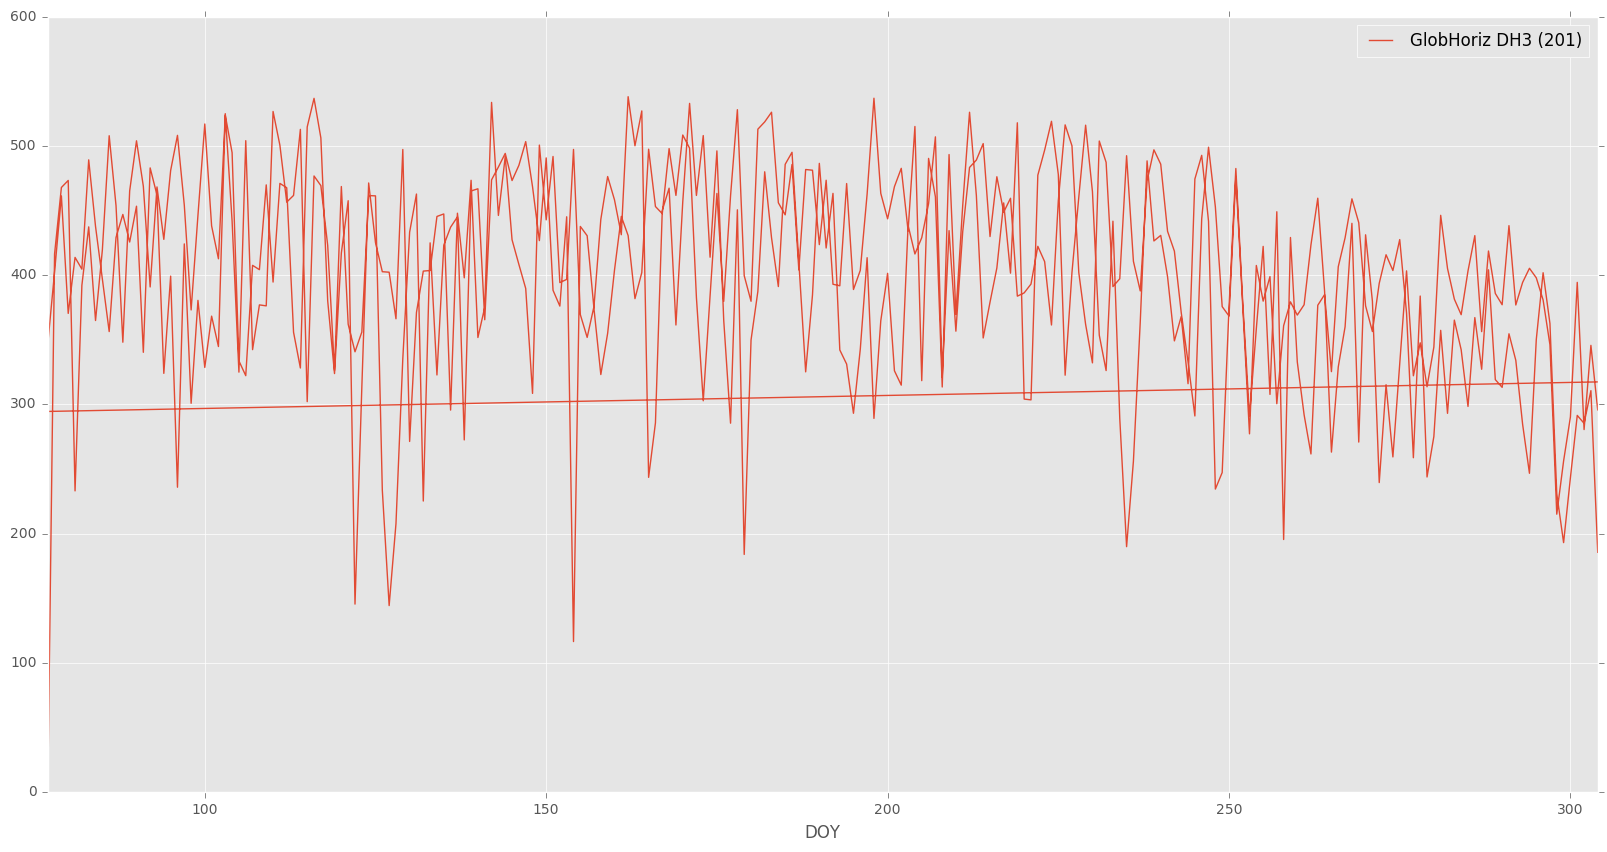

In [19]:
# Curve for a single panel

aggr_doy2_df_all.plot(x='DOY', y=single_pv, label=single_pv, kind='line', figsize = (20,10))

In [20]:
# Curve for a single panel - 'GlobTilt DH1 (208)'
# it was made just for tests
# aggr_doy2_df_all.plot(x='DOY', y='GlobTilt DH1 (208)', label='GlobTilt DH1 (208)', kind='line', figsize = (20,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A5FD5C0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ABE2EB8>], dtype=object)

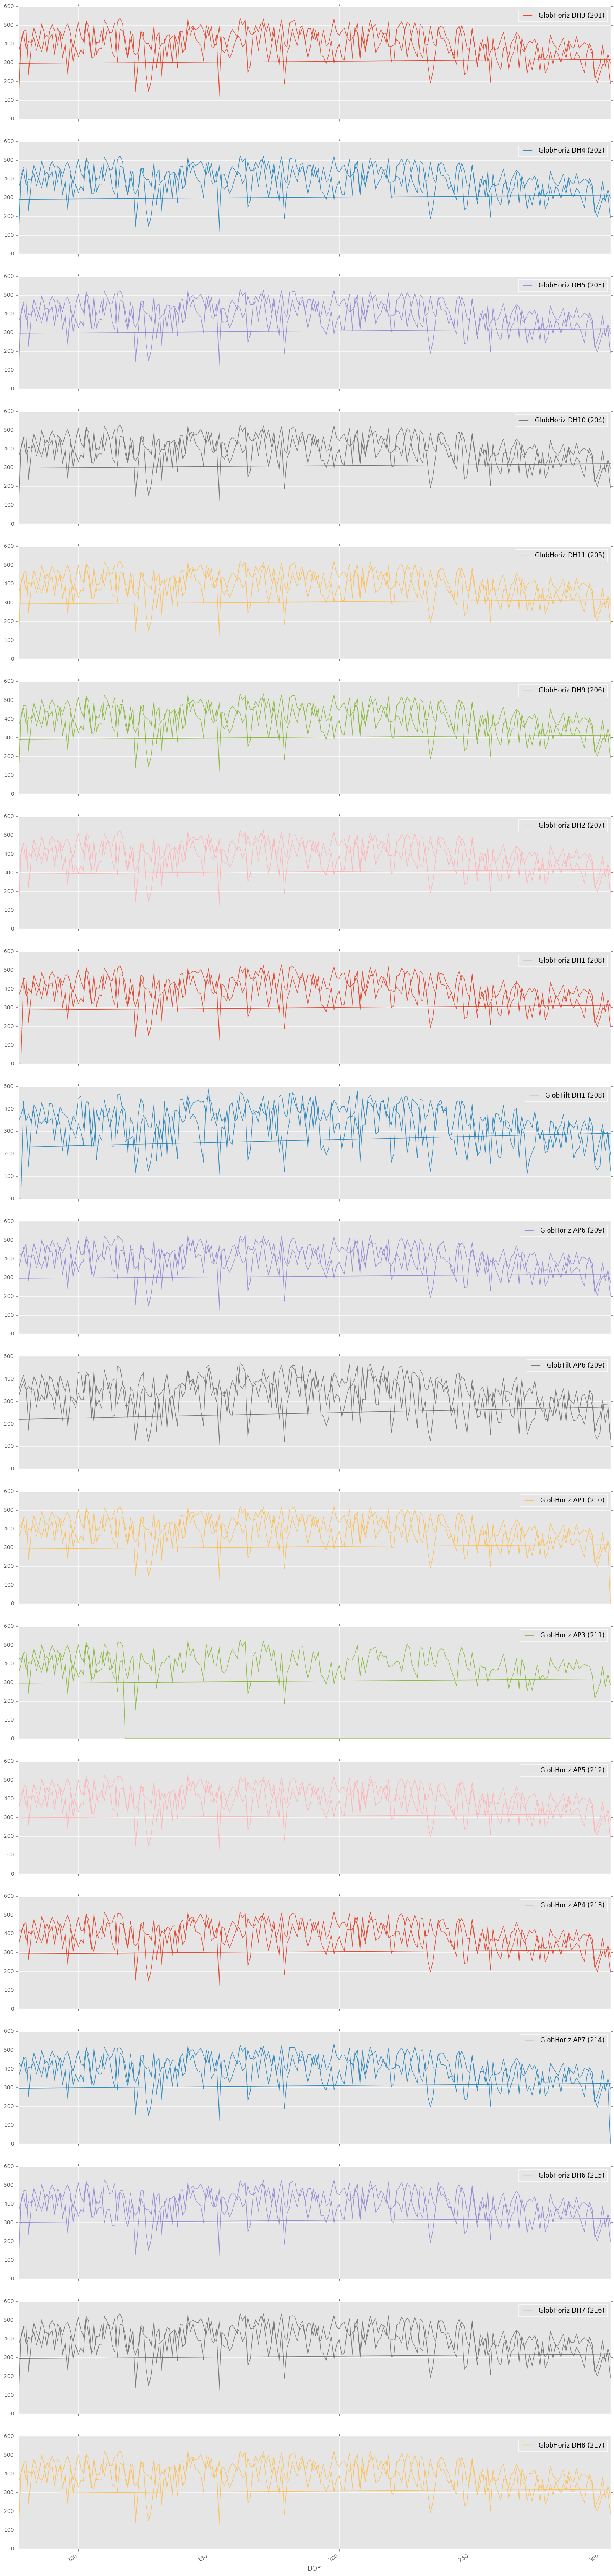

In [21]:
aggr_doy2_df_all.plot(x='DOY', y=target_cols, label=target_cols, subplots = True, figsize = (20, 5*len(target_cols)))

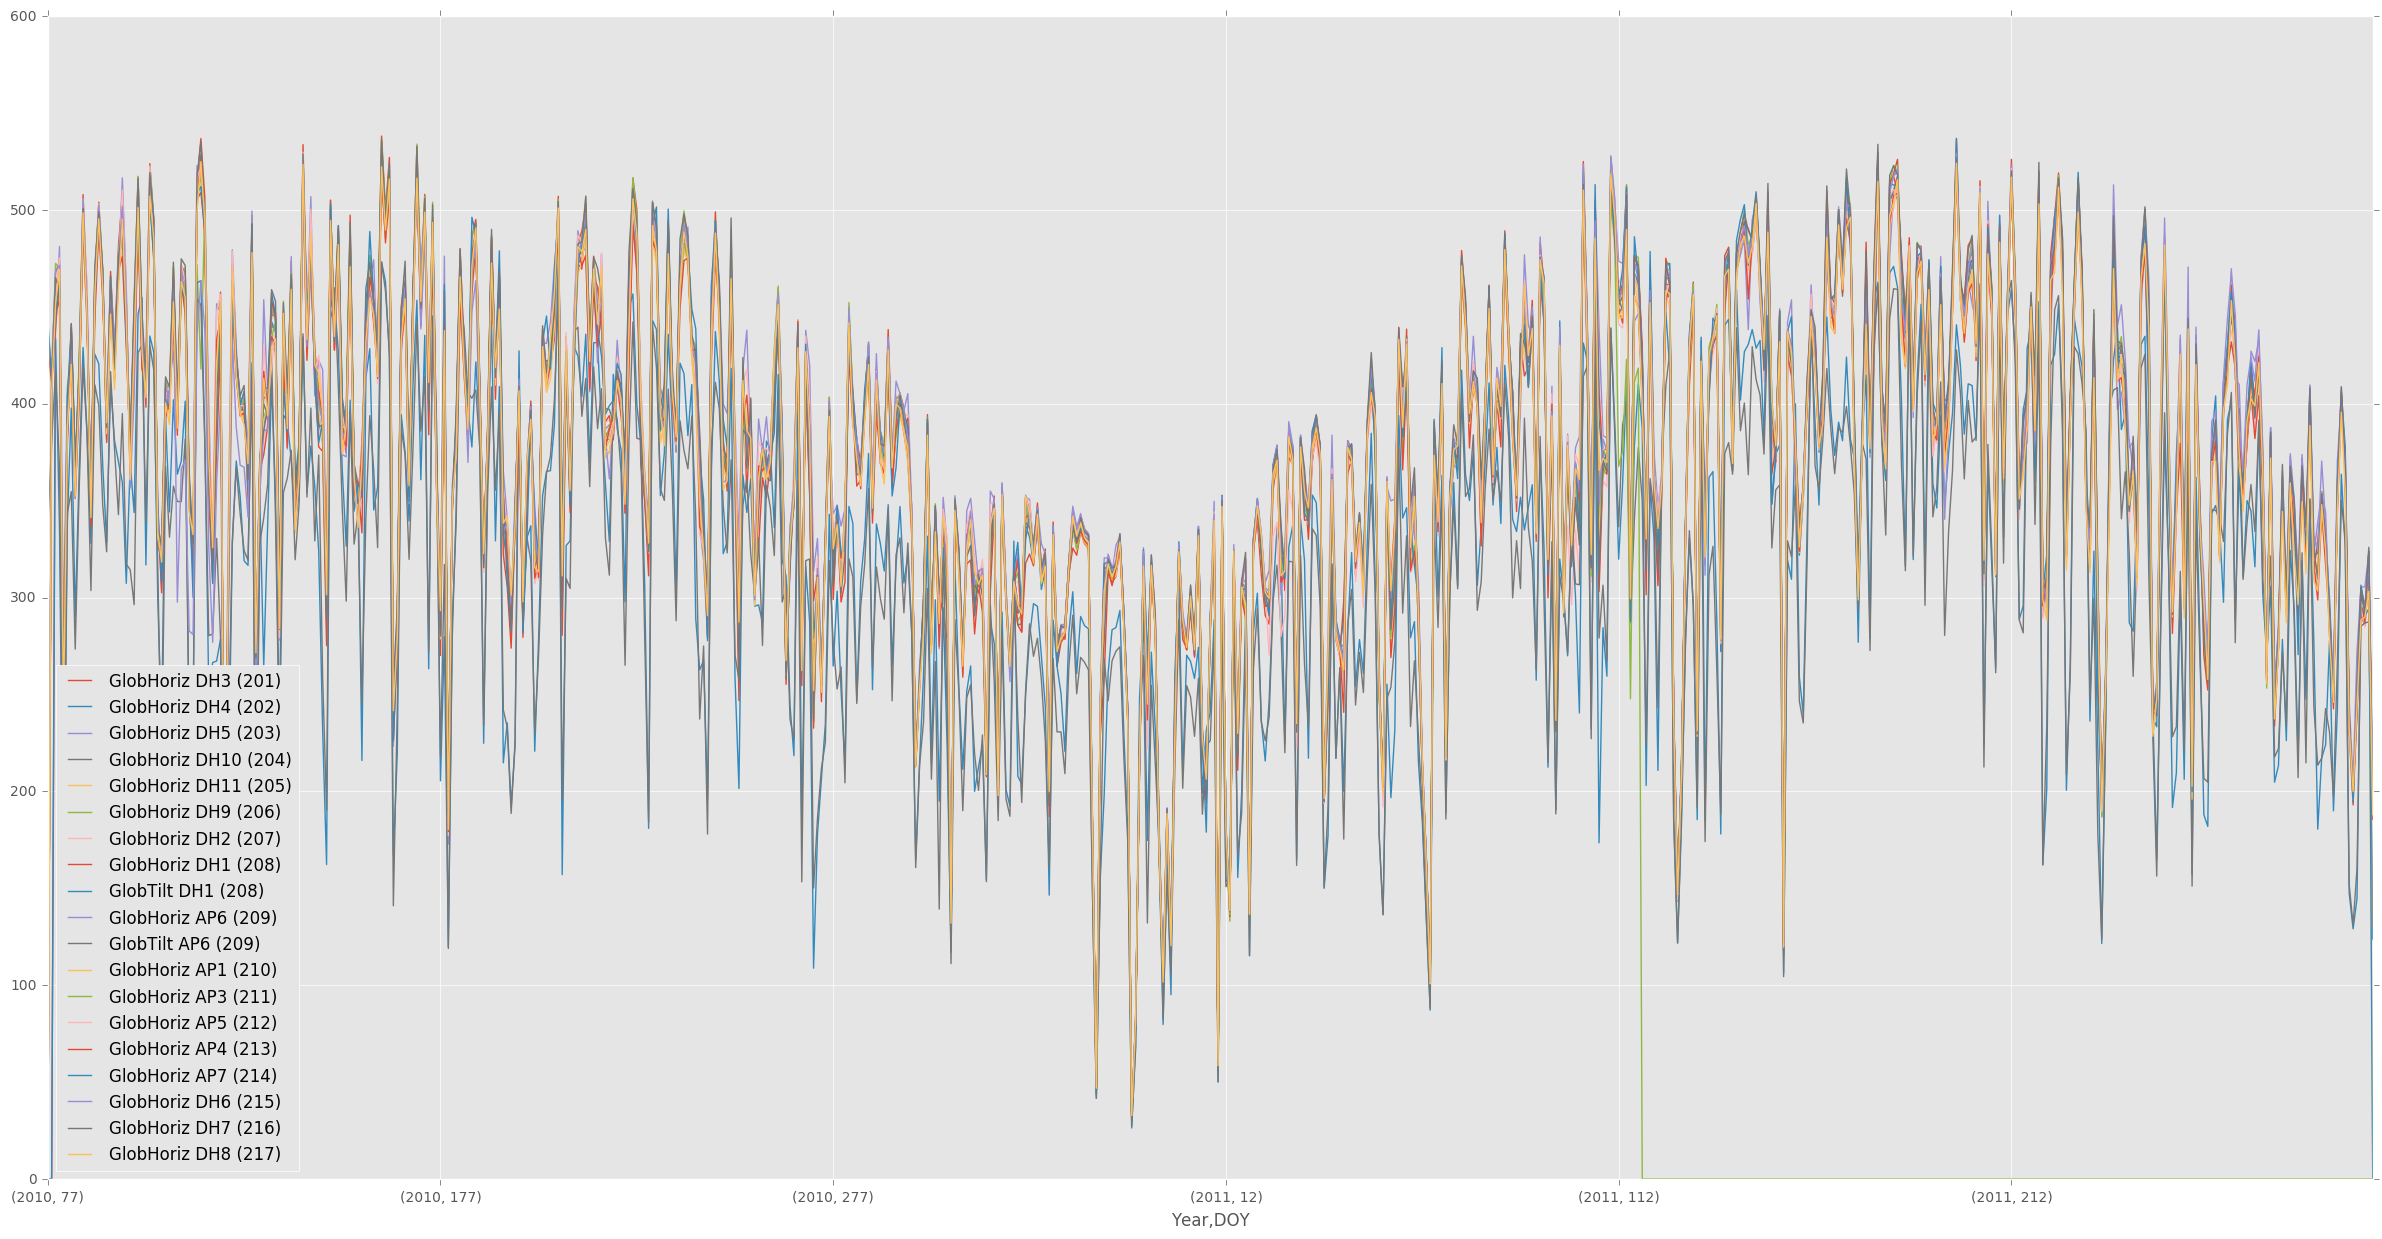

In [46]:
# excluding columns (solar panels) with no data available - different for different years

without_excluded_panels = []
panels_to_exclude = []

# if selected_year == '2010': 
#     panels_to_exclude = ['GlobHoriz DH1 (208)', 'GlobTilt DH1 (208)']

# if selected_year == '2011': 
#     panels_to_exclude = ['GlobHoriz AP1 (210)', 'GlobHoriz AP3 (211)', 'GlobHoriz AP7 (214)']

for panel in target_cols:
    if panel not in panels_to_exclude:
        without_excluded_panels.append(panel)
        
#print (without_excluded_panels)        
#aggr_doy2_df_all.plot(x='DOY', y=without_excluded_panels, label=without_excluded_panels, subplots = True, figsize = (30, 5 * len(without_excluded_panels)))
aggr_doy2_df_all_indexed = aggr_doy2_df_all.set_index(['Year', 'DOY'])
aggr_doy2_df_all.plot( x = aggr_doy2_df_all_indexed.index, y = without_excluded_panels, label = without_excluded_panels, subplots = False, figsize = (30, 15))